# Classification models and their quality assessment 

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders.target_encoder import TargetEncoder #счётчики
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('telecom_churn.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [7]:
X = df.iloc[:,:-1]
y = df['Churn']

In [8]:
#Закодируем  International plan и Voice mail plan с помощью dummy 
X = pd.get_dummies(X, columns=['International plan','Voice mail plan'],drop_first=True)

In [9]:
#Закодируем state с помощью счётчиков
tgt_enc = TargetEncoder(smoothing=1)
X['State'] = tgt_enc.fit_transform(X['State'], y)

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [10]:
#Отмасштабируем данные

from sklearn.base import TransformerMixin

class CustomScaler(TransformerMixin):
    def __init__(self, cols, scaler=None):
        self.cols = cols
        self.scaler = scaler or StandardScaler()
        
    def fit(self, X, y=None):
        num_cols = X.copy()[self.cols]
        self.scaler.fit(num_cols)
        return self
    def transform(self, X, y=None):
        X_res = X.copy()
        num_cols_tr = self.scaler.transform(X_res[self.cols])
        for i, col in enumerate(self.cols):
            X_res[col] = num_cols_tr[:,i]
        return X_res
    
    
sc = CustomScaler(X.columns.to_list())
X = sc.fit_transform(X)

In [11]:
X.rename(columns={'International plan_Yes': "International plan", "Voice mail plan_Yes": "Voice mail plan"})

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan
0,0.734279,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.327580,1.617086
1,-0.300721,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.327580,1.617086
2,2.155902,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.327580,-0.618396
3,-0.300721,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,3.052685,-0.618396
4,0.047269,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,3.052685,-0.618396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-1.483225,2.283878,-0.523603,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354,-0.327580,1.617086
3329,-0.910203,-0.830437,-0.523603,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641,-0.327580,-0.618396
3330,-0.946772,-1.835055,1.718817,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354,-0.327580,-0.618396
3331,0.310409,2.082955,1.718817,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354,3.052685,-0.618396


 

 
A) Подберём параметры для логистической регрессии




In [12]:
y.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

Как мы видим, у нас большой дизбаланс по таргету, поэтому использовать accuracy в качестве метрики качества будет нецелесообразным. Будем использовать f1-score

In [13]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(0.1, 10 ,0.1)}

logit = LogisticRegression()

cv = GridSearchCV(logit, params, scoring='f1', cv=5)

cv.fit(X, y)

print('best score:', cv.best_score_)
print('best params:', cv.best_params_)

best score: 0.3510341742187158
best params: {'C': 2.1}


Как мы видим, наилучший score не очень высок, наилучшее C = 2.1

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

logit = LogisticRegression(C = 2.1)

logit.fit(X_train, y_train)

#print(p1)

y_pred_test_lr = logit.predict(X_test)
y_pred_train_lr = logit.predict(X_train)


print('Качество f1 на train: ', f1_score(y_train, y_pred_train_lr), '\nКачество f1 на test: ', f1_score(y_test, y_pred_test_lr))

print('Качество accuracy на train: ', accuracy_score(y_train, y_pred_train_lr), '\nКачество accuracy на test: ', accuracy_score(y_test, y_pred_test_lr))

Качество f1 на train:  0.36363636363636365 
Качество f1 на test:  0.36257309941520466
Качество accuracy на train:  0.8683473389355743 
Качество accuracy на test:  0.8693045563549161


Качество не очень хорошее. Вероятно, есть недообучение

Б) Подберём параметры для метода опорных векторов

In [15]:
svm = SVC(kernel='linear') 
params = {'C': np.arange(0.1, 3 ,0.1), 'max_iter': [1000,2000,5000]}


cv = GridSearchCV(svm, params, cv=5, scoring='f1')
cv.fit(X, y)

print('best score:', cv.best_score_)
print('best params:', cv.best_params_)

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

best score: 0.4451085848805018
best params: {'C': 2.4000000000000004, 'max_iter': 5000}


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

svc = SVC(C = 2.4, max_iter = 5000, kernel='linear')

svc.fit(X_train, y_train)

y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)


print('Качество f1 на train: ', f1_score(y_train, y_pred_train_svc), '\nКачество f1 на test: ', f1_score(y_test, y_pred_test_svc))

print('Качество accuracy на train: ', accuracy_score(y_train, y_pred_train_svc), '\nКачество accuracy на test: ', accuracy_score(y_test, y_pred_test_svc))

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Качество f1 на train:  0.416403785488959 
Качество f1 на test:  0.3679245283018868
Качество accuracy на train:  0.8519407763105242 
Качество accuracy на test:  0.8393285371702638


Как мы видим, качество для данной модели незначительно выше. Также может быть недообучение, но переобучения не видно.

C)

Логистическая регрессия:

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [18]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('logit', LogisticRegression())])

In [19]:
params = {'logit__C': np.arange(0.1,10,0.1)}

grid = GridSearchCV(logit_pipe, params, cv=5, scoring = 'f1')

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

best score: 0.6588233974860481
best params: {'logit__C': 1.1}


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('logit', LogisticRegression(C = 1.1))])



logit_pipe.fit(X_train, y_train)


y_pred_test_lr = logit_pipe.predict(X_test)
y_pred_train_lr = logit_pipe.predict(X_train)


print('Качество f1 на train: ', f1_score(y_train, y_pred_train_lr), '\nКачество f1 на test: ', f1_score(y_test, y_pred_test_lr))

print('Качество accuracy на train: ', accuracy_score(y_train, y_pred_train_lr), '\nКачество accuracy на test: ', accuracy_score(y_test, y_pred_test_lr))

Качество f1 на train:  0.7616191904047975 
Качество f1 на test:  0.6458333333333333
Качество accuracy на train:  0.936374549819928 
Качество accuracy на test:  0.9184652278177458


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Мы видим, что качество алгоритма значительно улучшилось при добавлении полиномиальных признаков

Метод опорных векторов:

In [22]:
svm = SVC(kernel='linear')


params = {'C': np.arange(0.1, 3 ,0.1), 'max_iter': [1000,2000,5000]}

poly = PolynomialFeatures(degree=2)



cv = GridSearchCV(svm, params, cv=5, scoring='f1')
cv.fit(poly.fit_transform(X), y)

print('best score:', cv.best_score_)
print('best params:', cv.best_params_)

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

best score: 0.6736169587627695
best params: {'C': 0.1, 'max_iter': 5000}


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [23]:
X_pol = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y)

svc = SVC(C = 0.1, max_iter = 5000, kernel='linear')

svc.fit(X_train, y_train)

y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)


print('Качество f1 на train: ', f1_score(y_train, y_pred_train_svc), '\nКачество f1 на test: ', f1_score(y_test, y_pred_test_svc))

print('Качество accuracy на train: ', accuracy_score(y_train, y_pred_train_svc), '\nКачество accuracy на test: ', accuracy_score(y_test, y_pred_test_svc))

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Качество f1 на train:  0.7496062992125984 
Качество f1 на test:  0.690909090909091
Качество accuracy на train:  0.936374549819928 
Качество accuracy на test:  0.9184652278177458


В данном случае мы так же видим улучшиние качества

D)

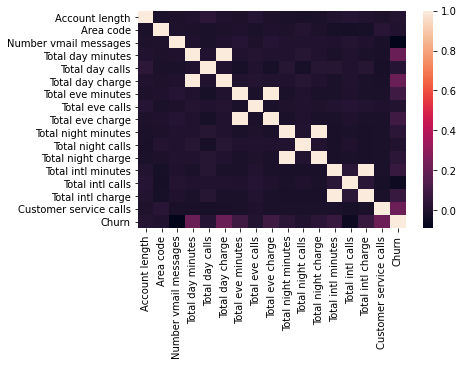

In [24]:
import seaborn as sns
sns.heatmap(df.corr())

Как мы можем заметить, два почти не коррелирующих с traget'ом признака - это "number vmail messages" и "total intl calls". 

Кроме того, есть пары коррелирующих между собой признаков: 'Total intl minutes' и "Total intl charge", "Total night minutes" и "Total night charge",  "Total day minutes" и "Total day charge", "Total eve minutes" и "Total eve charge".

Тогда можно удалить те, что не коррелируют с target, удалить удалить по одному признаку из каждой сильно коррелирующей пары, а затем заново применить полиномиальные признаки к нашим моделям.

In [25]:
X = X.drop(columns=['Number vmail messages', 'Total intl calls', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'])

In [26]:
X

,State,Account length,Area code,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,0.734279,0.676489,-0.523603,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.427932,-0.327580,1.617086
1,-0.300721,0.149065,-0.523603,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.427932,-0.327580,1.617086
2,2.155902,0.902529,-0.523603,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,-1.188218,-0.327580,-0.618396
3,-0.300721,-0.428590,-0.688834,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,0.332354,3.052685,-0.618396
4,0.047269,-0.654629,-0.523603,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,1.092641,3.052685,-0.618396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-1.483225,2.283878,-0.523603,-0.432895,-1.167924,0.286348,1.299506,1.547039,-0.874374,-0.120832,0.332354,-0.327580,1.617086
3329,-0.910203,-0.830437,-0.523603,0.942447,-2.164631,-0.938353,-2.264816,-0.189297,1.170023,-0.228304,1.092641,-0.327580,-0.618396
3330,-0.946772,-1.835055,1.718817,0.018820,0.426808,1.731930,-2.114211,-0.177431,-0.465494,1.383778,0.332354,-0.327580,-0.618396
3331,0.310409,2.082955,1.718817,0.624778,0.227466,-0.816080,-0.808966,-1.219628,1.885562,-1.876211,0.332354,3.052685,-0.618396


Проверим на логистической регрессии:

In [27]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('logit', LogisticRegression())])

params = {'logit__C': np.arange(0.1,10,0.1)}

grid = GridSearchCV(logit_pipe, params, cv=5, scoring = 'f1')

grid.fit(X, y)

print('best score:', grid.best_score_)
print('best params:', grid.best_params_)


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

best score: 0.6561227677366046
best params: {'logit__C': 2.9000000000000004}


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('logit', LogisticRegression(C = 2.9))])



logit_pipe.fit(X_train, y_train)


y_pred_test_lr = logit_pipe.predict(X_test)
y_pred_train_lr = logit_pipe.predict(X_train)


print('Качество f1 на train: ', f1_score(y_train, y_pred_train_lr), '\nКачество f1 на test: ', f1_score(y_test, y_pred_test_lr))

print('Качество accuracy на train: ', accuracy_score(y_train, y_pred_train_lr), '\nКачество accuracy на test: ', accuracy_score(y_test, y_pred_test_lr))

Качество f1 на train:  0.7085889570552147 
Качество f1 на test:  0.7102803738317758
Качество accuracy на train:  0.923969587835134 
Качество accuracy на test:  0.9256594724220624


In [34]:
from sklearn.model_selection import cross_validate


In [35]:
cv_res = cross_validate(logit_pipe, X, y, scoring=['f1', 'accuracy'], cv=5)
print('Средний f1 на кросс-валидации: ', cv_res['test_f1'].mean())
print('Средний accuracy на кросс-валидации: ', cv_res['test_accuracy'].mean())

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Средний f1 на кросс-валидации:  0.6561227677366046
Средний accuracy на кросс-валидации:  0.9114929021975499


In [36]:
from sklearn.metrics import roc_curve, auc
tpr, fpr, _ = roc_curve(y_test, logit_pipe.predict_proba(X_test)[:, 0])

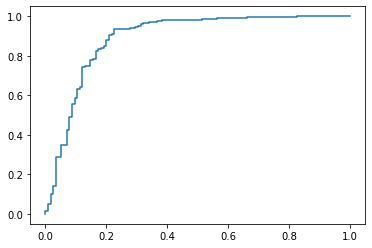

In [37]:
plt.plot(fpr, tpr)

In [38]:
print("Значение ROC-AUC на test'e: ", auc(fpr, tpr))

Значение ROC-AUC на test'e:  0.8898591038277801


Проверим на методе опорных векторов:

In [39]:
svm = SVC(kernel='linear')


params = {'C': np.arange(0.1, 3 ,0.1), 'max_iter': [1000,2000,5000]}

poly = PolynomialFeatures(degree=2)



cv = GridSearchCV(svm, params, cv=5, scoring='f1')
cv.fit(poly.fit_transform(X), y)

print('best score:', cv.best_score_)
print('best params:', cv.best_params_)


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

best score: 0.6452999323347769
best params: {'C': 0.1, 'max_iter': 2000}


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [40]:
X_pol = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y)

svc = SVC(C = 0.1, max_iter = 5000, kernel='linear')

svc.fit(X_train, y_train)

y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)


print('Качество f1 на train: ', f1_score(y_train, y_pred_train_svc), '\nКачество f1 на test: ', f1_score(y_test, y_pred_test_svc))

print('Качество accuracy на train: ', accuracy_score(y_train, y_pred_train_svc), '\nКачество accuracy на test: ', accuracy_score(y_test, y_pred_test_svc))

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Качество f1 на train:  0.7284768211920529 
Качество f1 на test:  0.6261682242990655
Качество accuracy на train:  0.9343737494997999 
Качество accuracy на test:  0.9040767386091128


In [41]:
cv_res = cross_validate(svc, X_pol, y, scoring=['f1', 'accuracy'], cv=5)
print('Средний f1 на кросс-валидации: ', cv_res['test_f1'].mean())
print('Средний accuracy на кросс-валидации: ', cv_res['test_accuracy'].mean())

C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your

Средний f1 на кросс-валидации:  0.6362838516677856
Средний accuracy на кросс-валидации:  0.9093926009967989


C:\Users\katen\Documents\PYTHOn\anakonda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

E) 

a) Логистическая регрессия дала лучший результат, хоть и не сильно выше (судя по средним оценкам f1 на кросс-валидации).

Средний f1 на кросс-валидации:  0.6561227677366046
Средний accuracy на кросс-валидации:  0.9114929021975499
Значение ROC-AUC на test'e:  0.8858723823346465


b)

Добавленных признаков не было, но были удалены два почти не коррелирующих с traget признака -  "number vmail messages" и "total intl calls"
Были удалены признаки из пар признаков, которые коррелировали друг с другом очень сильно: "Total intl charge", "Total night charge", "Total day charge", "Total eve charge".
Удалением признаков мы однозначно добились того, что в последнем случае разброс в обоих алгоритмах между train и test значительно скоратился. Это может сведетельствовать об уменьшении переобучения модели.



## Часть 2. Оценка качества моделей классификации (6 баллов).


**Задание 0 (1 балл)**. Закончите определения, начинающиеся так:

    * accuracy - это доля правильных ответов, доля объектов, для которых мы правильно предсказали класс: отношение количества объектов для которых был правильно предсказан положительный и отрицательный класс соответственно, к TP+TN+FP+FN
    
    * точность (precision) - это доля правильных ответов в пределах класса — это доля объектов действительно принадлежащих данному классу относительно всех объектов которые система отнесла к этому классу (TP/T(P+FP))
    
    * полнота (recall) - это доля правильных ответов, доля истинно положительных классификаций. Полнота показывает, какую долю объектов, реально относящихся к положительному классу, мы предсказали верно. (TP/(TP+FN))
    
    * TPR - это доля правильных ответов реально относящихся к положительному классу, предсказанная верно ====== RECALL
    
    
Продолжите определения прямо в этой ячейке.

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [42]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [43]:
df.shape

(689, 21)

In [44]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.460,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.170,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,...,2,0,1,1,0.776376,1,0.804659,1,0.910302,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,...,2,0,45,0,0.273138,0,0.175782,0,0.139252,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,...,2,100,1,1,0.383878,0,0.185941,0,0.272625,0
687,0,27.42,14.500,2,14,8,3.085,1,1,1,...,2,120,12,1,0.645865,1,0.804659,1,0.682064,1


**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [45]:
df['target'].value_counts(normalize=True)

0    0.554427
1    0.445573
Name: target, dtype: float64

Target не идеально сбалансирован по классам, соотношение не составляет 50 на 50, однако перекос не слишком критический

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

print('Значение accuracy для 1-го алгоритма: ',accuracy_score(df['target'].to_list(), df['pred1_classes'].to_list()))
print('Значение accuracy для 2-го алгоритма: ',accuracy_score(df['target'].to_list(), df['pred2_classes'].to_list()))
print('Значение accuracy для 3-го алгоритма: ',accuracy_score(df['target'].to_list(), df['pred3_classes'].to_list()))

print("\nНаибольшее значение accuracy имеет 2-ой алгоритм")

Значение accuracy для 1-го алгоритма:  0.6618287373004355
Значение accuracy для 2-го алгоритма:  0.6719883889695211
Значение accuracy для 3-го алгоритма:  0.6400580551523948

Наибольшее значение accuracy имеет 2-ой алгоритм


**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [47]:
print('Матирица ошибок для 1-го алгоритма: \n\n',(confusion_matrix(df['target'].to_list(), df['pred1_classes'].to_list())))

print('\nТочность равна: ', precision_score(df['target'].to_list(), df['pred1_classes'].to_list())) 
print('\nПолнота равна: ', recall_score(df['target'].to_list(), df['pred1_classes'].to_list())) 


Матирица ошибок для 1-го алгоритма: 

 [[322  60]
 [173 134]]

Точность равна:  0.6907216494845361

Полнота равна:  0.4364820846905538


In [48]:
print('Матирица ошибок для 2-го алгоритма: \n\n',(confusion_matrix(y_true = df['target'].to_list(),y_pred =  df['pred2_classes'].to_list())))

print('\nТочность равна: ', precision_score(df['target'].to_list(), df['pred2_classes'].to_list())) 
print('\nПолнота равна: ', recall_score(df['target'].to_list(), df['pred2_classes'].to_list())) 


Матирица ошибок для 2-го алгоритма: 

 [[239 143]
 [ 83 224]]

Точность равна:  0.6103542234332425

Полнота равна:  0.7296416938110749


In [49]:
print('Матирица ошибок для 3-го алгоритма: \n\n',(confusion_matrix(df['target'].to_list(), df['pred3_classes'].to_list())))

print('\nТочность равна: ', precision_score(df['target'].to_list(), df['pred3_classes'].to_list())) 
print('\nПолнота равна: ', recall_score(df['target'].to_list(), df['pred3_classes'].to_list())) 


Матирица ошибок для 3-го алгоритма: 

 [[334  48]
 [200 107]]

Точность равна:  0.6903225806451613

Полнота равна:  0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [50]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

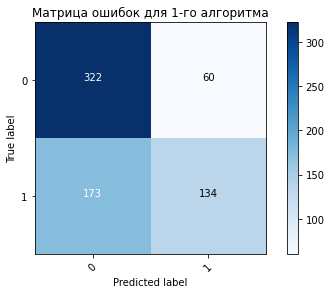

In [51]:
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), df['pred1_classes'].to_list()), classes = '01', title = 'Матрица ошибок для 1-го алгоритма')

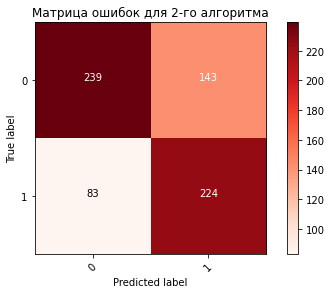

In [52]:
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), df['pred2_classes'].to_list()), classes = '01', title = 'Матрица ошибок для 2-го алгоритма', cmap = plt.cm.Reds)

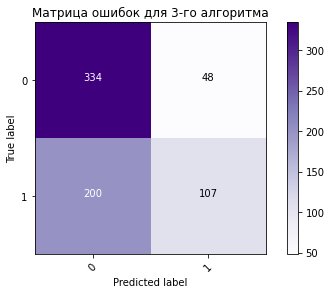

In [53]:
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), df['pred3_classes'].to_list()), classes = '01', title = 'Матрица ошибок для 3-го алгоритма', cmap = plt.cm.Purples)

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [56]:
pred1 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 0.5, 0.005):
    pred_1 = (df['pred1_probs'] > t).astype(int).to_list()
    rc = recall_score(y_true = y_true, y_pred = pred_1)
    ac = accuracy_score(y_true = y_true, y_pred = pred_1)
    
    infa.append({'Порог t': t,
                'Полнота': rc, 
                 'Accuracy': ac})
    
    
predd1 = pd.DataFrame(infa)

print((predd1[predd1['Accuracy'] >= 0.65]))

print('\n\nМаксимальная полнота для 1-го алгоритма при условии accurace >= 0.65: ', (predd1[predd1['Accuracy'] >= 0.65])['Полнота'].max())

    Порог t   Полнота  Accuracy
72    0.360  0.742671  0.651669
73    0.365  0.732899  0.650218
74    0.370  0.729642  0.654572
75    0.375  0.710098  0.650218
76    0.380  0.703583  0.651669
77    0.385  0.693811  0.658926
78    0.390  0.680782  0.658926
79    0.395  0.671010  0.664731
80    0.400  0.657980  0.667634
81    0.405  0.648208  0.666183
82    0.410  0.635179  0.664731
83    0.415  0.622150  0.666183
84    0.420  0.605863  0.667634
85    0.425  0.586319  0.661829
86    0.430  0.570033  0.663280
87    0.435  0.560261  0.663280
88    0.440  0.547231  0.666183
89    0.445  0.530945  0.660377
90    0.450  0.524430  0.664731
91    0.455  0.508143  0.663280
92    0.460  0.501629  0.663280
93    0.465  0.482085  0.658926
94    0.470  0.472313  0.661829
95    0.475  0.469055  0.663280
96    0.480  0.459283  0.661829
97    0.485  0.456026  0.666183
98    0.490  0.446254  0.664731
99    0.495  0.439739  0.663280


Максимальная полнота для 1-го алгоритма при условии accurace >= 0.65: 

In [58]:
pred2 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 0.5, 0.005):
    pred_2 = (df['pred2_probs'] > t).astype(int).to_list()
    rc = recall_score(y_true = y_true, y_pred = pred_2)
    ac = accuracy_score(y_true = y_true, y_pred = pred_2)
    
    infa.append({'Порог t': t,
                'Полнота': rc, 
                 'Accuracy': ac})
    
    
pr2 = pd.DataFrame(infa)

print((pr2[pr2['Accuracy'] >= 0.65]))

print('\n\nМаксимальная полнота для 2-го алгоритма при условии accurace >= 0.65: ', (pr2[pr2['Accuracy'] >= 0.65])['Полнота'].max())

    Порог t   Полнота  Accuracy
53    0.265  0.846906  0.674891
54    0.270  0.837134  0.674891
55    0.275  0.837134  0.674891
56    0.280  0.837134  0.674891
57    0.285  0.837134  0.674891
58    0.290  0.837134  0.674891
59    0.295  0.837134  0.674891
60    0.300  0.837134  0.674891
61    0.305  0.837134  0.674891
62    0.310  0.837134  0.674891
63    0.315  0.837134  0.674891
64    0.320  0.820847  0.685051
65    0.325  0.820847  0.685051
66    0.330  0.814332  0.682148
67    0.335  0.814332  0.682148
68    0.340  0.814332  0.682148
69    0.345  0.814332  0.682148
70    0.350  0.814332  0.682148
71    0.355  0.814332  0.682148
72    0.360  0.814332  0.682148
73    0.365  0.804560  0.686502
74    0.370  0.804560  0.686502
75    0.375  0.804560  0.686502
76    0.380  0.798046  0.683599
77    0.385  0.798046  0.683599
78    0.390  0.798046  0.683599
79    0.395  0.798046  0.683599
80    0.400  0.798046  0.683599
81    0.405  0.785016  0.682148
82    0.410  0.785016  0.682148
83    0.

In [60]:
pred3 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 0.5, 0.005):
    pred_3 = (df['pred3_probs'] > t).astype(int).to_list()
    rc = recall_score(y_true = y_true, y_pred = pred_3)
    ac = accuracy_score(y_true = y_true, y_pred = pred_3)
    
    infa.append({'Порог t': t,
                'Полнота': rc, 
                 'Accuracy': ac})
    
    
pr3 = pd.DataFrame(infa)

print((pr3[pr3['Accuracy'] >= 0.64]))

print('\n\nМаксимальная полнота для 3-го алгоритма при условии accuracy >= 0.65: ', (pr3[pr3['Accuracy'] >= 0.65])['Полнота'].max())

    Порог t   Полнота  Accuracy
46    0.230  0.641694  0.640058
47    0.235  0.635179  0.642961
48    0.240  0.622150  0.640058
50    0.250  0.615635  0.641509
51    0.255  0.609121  0.641509
52    0.260  0.609121  0.645864
53    0.265  0.596091  0.645864
54    0.270  0.579805  0.640058
55    0.275  0.570033  0.640058
67    0.335  0.482085  0.641509
68    0.340  0.475570  0.640058
72    0.360  0.456026  0.641509
76    0.380  0.429967  0.642961
77    0.385  0.420195  0.641509
78    0.390  0.420195  0.642961
79    0.395  0.416938  0.645864
80    0.400  0.413681  0.645864
81    0.405  0.407166  0.644412
82    0.410  0.397394  0.640058
83    0.415  0.397394  0.640058
84    0.420  0.397394  0.644412
85    0.425  0.394137  0.644412
91    0.455  0.364821  0.640058
96    0.480  0.355049  0.640058
97    0.485  0.355049  0.642961
98    0.490  0.355049  0.642961
99    0.495  0.351792  0.641509


Максимальная полнота для 3-го алгоритма при условии accuracy >= 0.65:  nan


Если мы понижаем порог, то получается, что количество объектов FN (те, кому не выдали кредит, при условии, что выдать его было нужно) уменьшается, а TP растёт. Соответственно, расчёт и полнота, но может падать accuracy.

 в 3-ем алгоритме мы в принципе не можем добиться acccuracy выше 0.65.

**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

Начнём с 1-го алгоритма, где наилучшая полнота = 0.742671009771987 была достигнута при t = 0.36

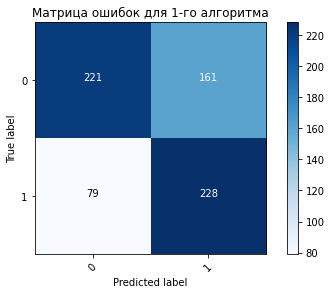

In [61]:
pred_1 = (df['pred1_probs'] > 0.36).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_1), classes = '01', title = 'Матрица ошибок для 1-го алгоритма')

In [62]:
print('Точность для 1-го алгоритма: ', precision_score(df['target'].to_list(), pred_1))

Точность для 1-го алгоритма:  0.5861182519280206


Во втором алгоритме лучшая полнота = 0.8469055374592834 при t = 0.265

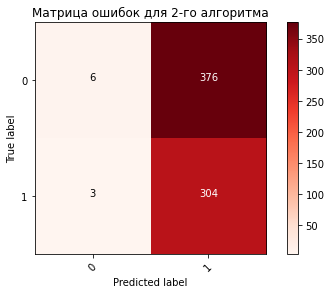

In [63]:
pred_2 = (df['pred1_probs'] > 0.265).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_2), classes = '01', title = 'Матрица ошибок для 2-го алгоритма', cmap = plt.cm.Reds)

In [64]:
print("Точность для 2-го алгоритма: ", precision_score(df['target'].to_list(), pred_2))

Точность для 2-го алгоритма:  0.4470588235294118


**Выводы:** Начнём с того, что 3 алгоритм в принципе не справился с задачей превышения над уровнем accuracy = 0.65.

Относительно первых двух алгоритмов: задача была увеличить полноту как можно сильнее при заданном accuracy, второй алгоритм справился с этим лучше. 
Тем не менее, если бы задача была бы ещё и не сводить точность (precision) алгоритма к минимуму, то выбранный порог t для второго алгоритма и его превосходство над первым могли бы встать под сомнение.
Я бы лучше  немного увеличила полноту путём повышения порога, чтобы увеличить точность и сделать 2-ой алгоритм более сбалансированным, а то наш алгоритм просто выдаёт кредит всем подряд. Даже при несильном увеличении порога t точность возрастёт нормально так.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [66]:
pred1 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_1 = (df['pred1_probs'] > t).astype(int).to_list()
    pr = precision_score(y_true = y_true, y_pred = pred_1)
    ac = accuracy_score(y_true = y_true, y_pred = pred_1)
    
    infa.append({'Порог t': t,
                'Точность': pr, 
                 'Accuracy': ac})
    
    
pr1 = pd.DataFrame(infa)

print((pr1[pr1['Accuracy'] >= 0.65]))

print('\n\nМаксимальная точность для 1-го алгоритма при условии accuracy >= 0.65: ', (pr1[pr1['Accuracy'] >= 0.65])['Точность'].max())

     Порог t  Точность  Accuracy
72     0.360  0.586118  0.651669
73     0.365  0.585938  0.650218
74     0.370  0.591029  0.654572
75     0.375  0.589189  0.650218
76     0.380  0.591781  0.651669
77     0.385  0.601695  0.658926
78     0.390  0.604046  0.658926
79     0.395  0.613095  0.664731
80     0.400  0.619632  0.667634
81     0.405  0.619938  0.666183
82     0.410  0.621019  0.664731
83     0.415  0.626230  0.666183
84     0.420  0.632653  0.667634
85     0.425  0.629371  0.661829
86     0.430  0.636364  0.663280
87     0.435  0.639405  0.663280
88     0.440  0.648649  0.666183
89     0.445  0.644269  0.660377
90     0.450  0.654472  0.664731
91     0.455  0.658228  0.663280
92     0.460  0.660944  0.663280
93     0.465  0.660714  0.658926
94     0.470  0.671296  0.661829
95     0.475  0.676056  0.663280
96     0.480  0.677885  0.661829
97     0.485  0.689655  0.666183
98     0.490  0.691919  0.664731
99     0.495  0.692308  0.663280
100    0.500  0.690722  0.661829
101    0.5

In [67]:
import warnings
warnings.filterwarnings("ignore")
pred2 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_2 = (df['pred2_probs'] > t).astype(int).to_list()
    pr = precision_score(y_true = y_true, y_pred = pred_2)
    ac = accuracy_score(y_true = y_true, y_pred = pred_2)
    
    infa.append({'Порог t': t,
                'Точность': pr, 
                 'Accuracy': ac})
    
    
predd2 = pd.DataFrame(infa)

print((predd2[predd2['Accuracy'] >= 0.65]))

print('\n\nМаксимальная точность для 2-го алгоритма при условии accuracy >= 0.65: ', (predd2[predd2['Accuracy'] >= 0.65])['Точность'].max())

     Порог t  Точность  Accuracy
53     0.265  0.594966  0.674891
54     0.270  0.596288  0.674891
55     0.275  0.596288  0.674891
56     0.280  0.596288  0.674891
57     0.285  0.596288  0.674891
..       ...       ...       ...
147    0.735  0.836735  0.650218
148    0.740  0.836735  0.650218
149    0.745  0.836735  0.650218
150    0.750  0.836735  0.650218
151    0.755  0.836735  0.650218

[99 rows x 3 columns]


Максимальная точность для 2-го алгоритма при условии accuracy >= 0.65:  0.8367346938775511


In [68]:
(predd2[predd2['Accuracy'] >= 0.65])[(predd2[predd2['Accuracy'] >= 0.65])['Точность'] == 0.8367346938775511]

,Порог t,Точность,Accuracy
145,0.725,0.836735,0.650218
146,0.730,0.836735,0.650218
147,0.735,0.836735,0.650218
148,0.740,0.836735,0.650218
149,0.745,0.836735,0.650218
150,0.750,0.836735,0.650218
151,0.755,0.836735,0.650218


В данном случае точность почти не меняется, но возьмём порог пониже (t = 0.725), чтобы улучшить полноту

In [70]:
pred3 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_3 = (df['pred3_probs'] > t).astype(int).to_list()
    pr = precision_score(y_true = y_true, y_pred = pred_3)
    ac = accuracy_score(y_true = y_true, y_pred = pred_3)
    
    infa.append({'Порог t': t,
                'Точность': pr, 
                 'Accuracy': ac})
    
    
predd3 = pd.DataFrame(infa)

print((predd3[predd3['Accuracy'] >= 0.65]))

print('\n\nМаксимальная точность для 3-го алгоритма при условии accuracy >= 0.65: ', (predd3[predd3['Accuracy'] >= 0.65])['Точность'].max())

Empty DataFrame
Columns: [Порог t, Точность, Accuracy]
Index: []


Максимальная точность для 3-го алгоритма при условии accuracy >= 0.65:  nan


Опять-таки, accuracy выше 0.65 в 3-ем алгоритме добиться не можем

**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

В первом алгоритме максимальной точности равной 0.8367346938775511 при accuracy >= 0.65 мы добились при t = 0.54

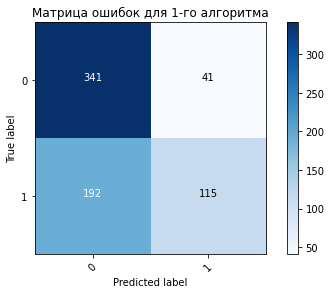

In [71]:
pred_1 = (df['pred1_probs'] > 0.54).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_1), classes = '01', title = 'Матрица ошибок для 1-го алгоритма')

In [72]:
print('Полнота для 1-го алгоритма: ', recall_score(df['target'].to_list(), pred_1))

Полнота для 1-го алгоритма:  0.3745928338762215


Во втором алгоритме максимальной точности равной 0.836735 при accuracy >= 0.65 мы добились при t = 0.725

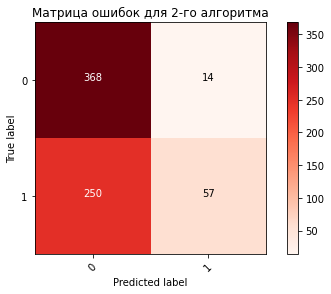

In [73]:
pred_2 = (df['pred1_probs'] > 0.725).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_2), classes = '01', title = 'Матрица ошибок для 2-го алгоритма', cmap = plt.cm.Reds)

In [74]:
print('Полнота для 2-го алгоритма: ', recall_score(df['target'].to_list(), pred_2))

Полнота для 2-го алгоритма:  0.18566775244299674


**Выводы:** С данной задачей лучше справился второй алгоритм, так как его точность получилась выше.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [75]:
pred1 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_1 = (df['pred1_probs'] > t).astype(int).to_list()
    f1 = f1_score(y_true = y_true, y_pred = pred_1)
    ac = accuracy_score(y_true = y_true, y_pred = pred_1)
    
    infa.append({'Порог t': t,
                'F1-score': f1, 
                 'Accuracy': ac})
    
    
predd1 = pd.DataFrame(infa)

print('\n\nМаксимальынй F1-score для 1-го алгоритма: ', predd1['F1-score'].max(), ' порог t = ', predd1[(predd1['F1-score'] == predd1['F1-score'].max())].values[0][0])
print('\n')
print(predd1[(predd1['F1-score'] == predd1['F1-score'].max())])



Максимальынй F1-score для 1-го алгоритма:  0.672  порог t =  0.34


    Порог t  F1-score  Accuracy
68     0.34     0.672  0.642961


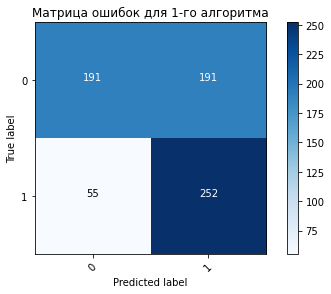

In [76]:
pred_1 = (df['pred1_probs'] > 0.34).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_1), classes = '01', title = 'Матрица ошибок для 1-го алгоритма')

In [77]:
pred2 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_2 = (df['pred2_probs'] > t).astype(int).to_list()
    f1 = f1_score(y_true = y_true, y_pred = pred_2)
    ac = accuracy_score(y_true = y_true, y_pred = pred_2)
    
    infa.append({'Порог t': t,
                'F1-score': f1, 
                 'Accuracy': ac})
    
    
predd2 = pd.DataFrame(infa)

print('\n\nМаксимальынй F1-score для 2-го алгоритма: ', predd2['F1-score'].max(), ' порог t = ', predd2[(predd2['F1-score'] == predd2['F1-score'].max())].values[0][0])
print('\n')
print(predd2[(predd2['F1-score'] == predd2['F1-score'].max())])



Максимальынй F1-score для 2-го алгоритма:  0.6990291262135923  порог t =  0.32


    Порог t  F1-score  Accuracy
64    0.320  0.699029  0.685051
65    0.325  0.699029  0.685051


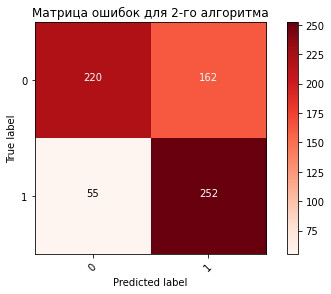

In [78]:
pred_2 = (df['pred2_probs'] > 0.32).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_2), classes = '01', title = 'Матрица ошибок для 2-го алгоритма', cmap = plt.cm.Reds)

In [79]:
pred3 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_3 = (df['pred3_probs'] > t).astype(int).to_list()
    f1 = f1_score(y_true = y_true, y_pred = pred_3)
    ac = accuracy_score(y_true = y_true, y_pred = pred_3)
    
    infa.append({'Порог t': t,
                'F1-score': f1, 
                 'Accuracy': ac})
    
    
predd3 = pd.DataFrame(infa)

print('\n\nМаксимальынй F1-score для 3-го алгоритма: ', predd3['F1-score'].max(), ' порог t = ', predd3[(predd3['F1-score'] == predd3['F1-score'].max())].values[0][0])
print('\n')
print(predd3[(predd3['F1-score'] == predd3['F1-score'].max())])



Максимальынй F1-score для 3-го алгоритма:  0.6443418013856813  порог t =  0.15


    Порог t  F1-score  Accuracy
30     0.15  0.644342  0.552975


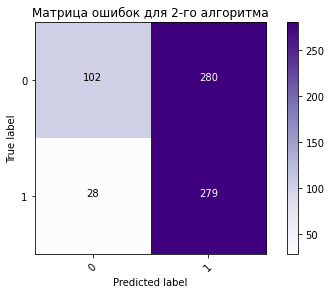

In [80]:
pred_3 = (df['pred3_probs'] > 0.15).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_3), classes = '01', title = 'Матрица ошибок для 2-го алгоритма', cmap = plt.cm.Purples)

**Выводы:**

-1-ый алгоритм: max f1-score = 0.672, порог t = 0.34
-2-ой алгоритм: max f1-score = 0.699029, порог t = 0.32
-3-ий алгоритм: max f1-score = 0.644342, порог t = 0.15
- второй алгоритм справился с задачей максимизации f1-score наилучшим образом


#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [81]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [82]:
X = df.iloc[:,:14]
y = df['target']

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logit = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

logit.fit(X_train, y_train)

pred4_classes = logit.predict(X)

In [85]:
pred4_probs = (pd.DataFrame(logit.predict_proba(X)).iloc[:,1:])

In [86]:
df1 = df
df1['pred4_probs'] = pred4_probs
df1['pred4_classes'] = pd.DataFrame(pred4_classes)
df1

,0,1,2,3,4,5,6,7,8,9,...,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes,pred4_probs,pred4_classes
0,1,22.08,11.460,2,4,4,1.585,0,0,0,...,1213,0,0.506772,1,0.610853,1,0.375494,0,0.029428,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,...,1,0,0.358519,0,0.185941,0,0.200975,0,0.056814,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,...,1,0,0.358753,0,0.523009,1,0.160465,0,0.009942,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,...,1,1,0.408729,0,0.185941,0,0.357771,0,0.785539,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,...,159,1,0.480904,0,0.526646,1,0.260169,0,0.976204,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,...,1,1,0.776376,1,0.804659,1,0.910302,1,0.932051,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,...,45,0,0.273138,0,0.175782,0,0.139252,0,0.102447,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,...,1,1,0.383878,0,0.185941,0,0.272625,0,0.536756,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,...,12,1,0.645865,1,0.804659,1,0.682064,1,0.898585,1


**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [87]:
pred4 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 0.5, 0.005):
    pred_4 = (df['pred4_probs'] > t).astype(int).to_list()
    rc = recall_score(y_true = y_true, y_pred = pred_4)
    ac = accuracy_score(y_true = y_true, y_pred = pred_4)
    
    infa.append({'Порог t': t,
                'Полнота': rc, 
                 'Accuracy': ac})
    
    
predd4 = pd.DataFrame(infa)

print((predd4[predd4['Accuracy'] >= 0.65]))

print('\n\nМаксимальная полнота для логистической регрессии при условии accurace >= 0.65: ', (predd4[predd4['Accuracy'] >= 0.65])['Полнота'].max())

    Порог t   Полнота  Accuracy
8     0.040  0.990228  0.669086
9     0.045  0.986971  0.677794
10    0.050  0.983713  0.695210
11    0.055  0.983713  0.711176
12    0.060  0.983713  0.734398
..      ...       ...       ...
95    0.475  0.885993  0.869376
96    0.480  0.885993  0.869376
97    0.485  0.882736  0.870827
98    0.490  0.882736  0.870827
99    0.495  0.876221  0.867925

[92 rows x 3 columns]


Максимальная полнота для логистической регрессии при условии accurace >= 0.65:  0.990228013029316


а) порог t равен 0.045 

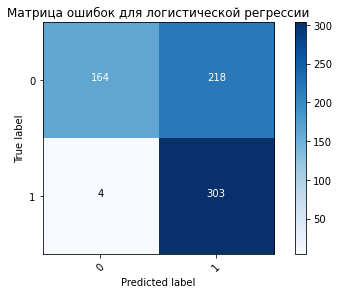

In [88]:
pred_4 = (df['pred4_probs'] > 0.045).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_4), classes = '01', title = 'Матрица ошибок для логистической регрессии')

In [89]:
pred4 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_4 = (df['pred4_probs'] > t).astype(int).to_list()
    pr = precision_score(y_true = y_true, y_pred = pred_4)
    ac = accuracy_score(y_true = y_true, y_pred = pred_4)
    
    infa.append({'Порог t': t,
                'Точность': pr, 
                 'Accuracy': ac})
    
    
predd4 = pd.DataFrame(infa)

print((predd4[predd4['Accuracy'] >= 0.65]))

print('\n\nМаксимальная точность для логистической регрессии при условии accuracy >= 0.65: ', (predd4[predd4['Accuracy'] >= 0.65])['Точность'].max())

     Порог t  Точность  Accuracy
8      0.040  0.574669  0.669086
9      0.045  0.581574  0.677794
10     0.050  0.595661  0.695210
11     0.055  0.608871  0.711176
12     0.060  0.629167  0.734398
..       ...       ...       ...
190    0.950  0.970874  0.695210
191    0.955  0.969388  0.687954
192    0.960  0.967391  0.679245
193    0.965  0.961538  0.658926
194    0.970  0.958333  0.650218

[187 rows x 3 columns]


Максимальная точность для логистической регрессии при условии accuracy >= 0.65:  0.9779411764705882


In [90]:
(predd4[predd4['Accuracy'] >= 0.65])[(predd4['Точность'] == predd4[predd4['Accuracy'] >= 0.65]['Точность'].max())]

,Порог t,Точность,Accuracy
182,0.91,0.977941,0.743106


b) Порог t равен  0.895

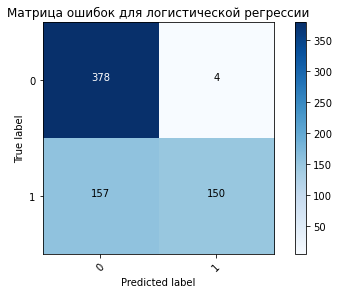

In [91]:

pred_4 = (df['pred4_probs'] > 0.895).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_4), classes = '01', title = 'Матрица ошибок для логистической регрессии')

In [92]:
pred4 = []
infa = []
y_true = df['target'].to_list()
for t in np.arange(0, 1, 0.005):
    pred_4 = (df['pred4_probs'] > t).astype(int).to_list()
    f1 = f1_score(y_true = y_true, y_pred = pred_4)
    ac = accuracy_score(y_true = y_true, y_pred = pred_4)
    
    infa.append({'Порог t': t,
                'F1-score': f1, 
                 'Accuracy': ac})
    
    
predd4 = pd.DataFrame(infa)

print('\n\nМаксимальынй F1-score для логистической регрессии: ', predd4['F1-score'].max(), ' порог t = ', predd4[(predd4['F1-score'] == predd4['F1-score'].max())].values[0][0])
print('\n')
print(predd4[(predd4['F1-score'] == predd4['F1-score'].max())])



Максимальынй F1-score для логистической регрессии:  0.8650306748466258  порог t =  0.405


    Порог t  F1-score  Accuracy
81    0.405  0.865031  0.872279
82    0.410  0.865031  0.872279


с) Порог t равен 0.525 

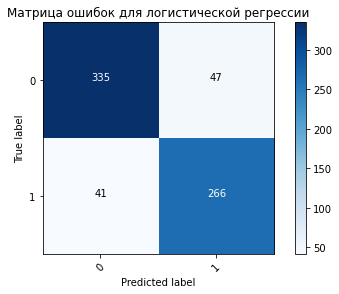

In [93]:
pred_4 = (df['pred4_probs'] > 0.525).astype(int).to_list()
plot_confusion_matrix(confusion_matrix(df['target'].to_list(), pred_4), classes = '01', title = 'Матрица ошибок для логистической регрессии')

**Выводы:**

Модель становилась получше, мы предсказания делали на части данных, на которых обучались, поэтому офк так будет
